# Homework-2
**Done by:**

**Kochurov Maxim (э201) and Rjanova Valery (э506)**

In [1]:
# import 
from scipy.stats import multivariate_normal
from numpy import random
import numpy as np
from itertools import product
import warnings
import pandas as pd
import scipy as sp
import numpy.linalg as linal
import sklearn
from sklearn import cross_validation, linear_model, tree, ensemble, grid_search
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.stats import beta
random.seed(0)

## Problem 1
### a)

Give an example of two trees of depth K such that their linear combination is a tree of length greater than K.

#### Solution
$$ K=2$$

Their linear combination has depth $$4>K$$
![image](https://raw.githubusercontent.com/Ferrine/Econometrics/master/ha-2/img/tree.png)

$$ Var(1/B\sum_{b=1}^{B}T_b(x))= 1/B^2(E[(\sum_{b=1}^{B}T_b(x))^2] - (E[\sum_{b=1}^{B}T_b(x)])^2)= \\
1/B^2(E(\sum_{b=1}^{B}\sum_{i=1}^{B}T_b(x)T_i(x)-\sum_{b=1}^{B}\sum_{i=1}^{B}E(T_b(x))E(T_i(x)))= \\ 
1/B^2\sum_{b=1}^{B}\sum_{i=1}^{B}(E(T_b(x)T_i(x))-E(T_b(x))E(T_i(x))=\\
1/B^2\sum_{b=1}^{B}\sum_{i=1}^{B}Cov(T_b(x), T_i(x))=$$

$$=1/B^2\sum_{b=1}^{B}(\sum_{i=b}^{B}Cov(T_i(x), T_b(x)) + Var(T_b(x))) = \\
1/B^2\sum_{b=1}^{B}((B-1)\sigma^2\rho + \sigma^2=(B(B-1)\rho\sigma^2+ B\sigma^2)/B^2= \\
(B-1)\rho\sigma^2/B+\sigma^2/B=\rho\sigma^2-\rho\sigma^2/B+\sigma^2=\rho\sigma^2+\sigma^2(1-\rho)/B$$

If $$\rho$$ is less than zero, then we have variance less than zero, it's bad. But it's hard to belive in that because samples and thus observations are positive correlated.

In [2]:
Data = pd.read_csv('cal_housing.data', header=None)
scaler = sklearn.preprocessing.StandardScaler()
Data.describe()
train, test = train_test_split(Data, test_size=0.3)
X_train = train.ix[:,0:7]
y_train = train[[8]]
X_test = test.ix[:,0:7]
y_test = test[[8]]
y =np.ravel(y_train)

In [3]:
random_forest = ensemble.RandomForestRegressor(n_estimators=200, min_samples_split=1, max_features=6)
gbt = ensemble.GradientBoostingRegressor(n_estimators=2000, learning_rate=0.1, max_leaf_nodes=6 )

In [4]:
forest_train = random_forest.fit(X_train, y)

In [5]:
gbt_train = gbt.fit(X_train, y)

In [6]:
y_predict_forest = forest_train.predict(X_test)
mse_forest = mean_squared_error(y_test, y_predict_forest)
y_predict_gbt = gbt_train.predict(X_test)
mse_gbt = mean_squared_error(y_test, y_predict_gbt)
print(mse_forest, mse_gbt)

2443371301.77 2276320905.62


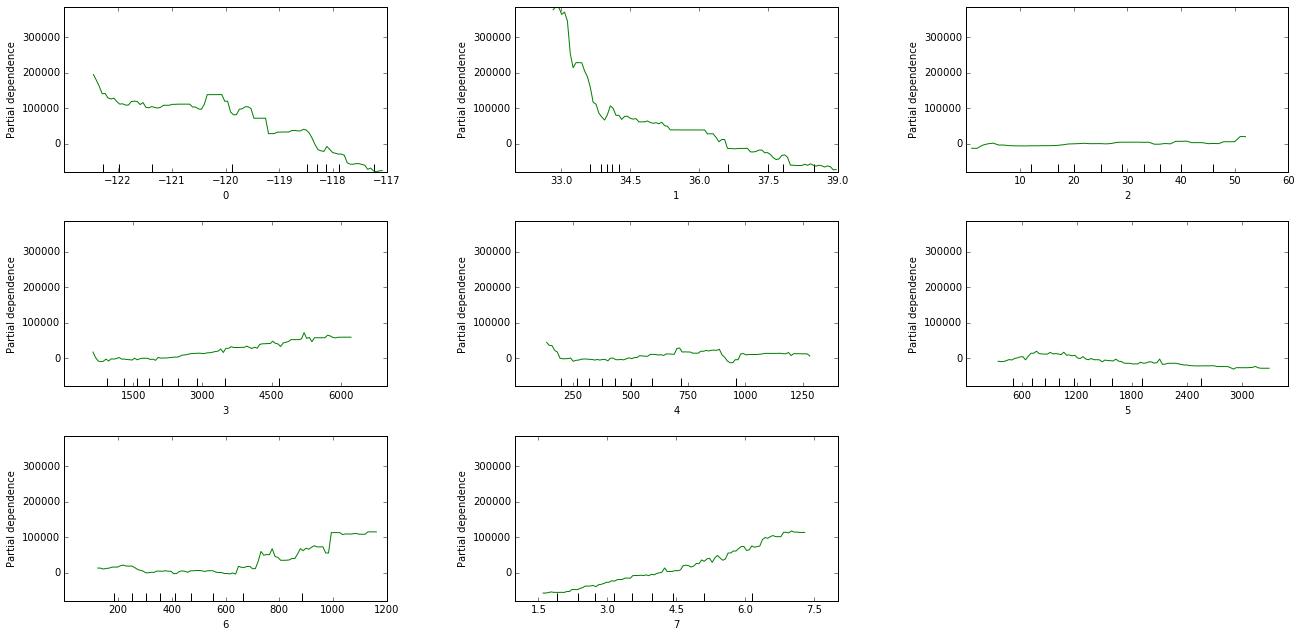

In [7]:
fig, axs = ensemble.partial_dependence.plot_partial_dependence(gbt, X_train, range(8), feature_names=X_train.columns)
fig.set_figwidth(20)
fig.set_figheight(15)
plt.show()

In [8]:
params = {'min_samples_leaf': np.arange(1, 9, 2) , 'max_features': [2, 4, 6, 7]}
CV_rf = grid_search.GridSearchCV(forest_train, params)
CV_rf.fit(X_train, y)
random_forest_best = CV_rf.best_estimator_
y_predict_forest_best = random_forest_best.predict(X_test)
mse_forest_best = mean_squared_error(y_test, y_predict_forest_best)
print(CV_rf.best_params_, "best score", mse_forest_best)

{'min_samples_leaf': 1, 'max_features': 6} best score 2448307161.44


In [9]:
params_gb = {'learning_rate': np.arange(0.1, 0.5, 0.1),  'max_leaf_nodes': np.arange(3, 8, 1)}
CV_gb = grid_search.GridSearchCV(gbt_train, params_gb)
CV_gb.fit(X_train, y)
gb_best = CV_gb.best_estimator_
y_predict_gb_best = gb_best.predict(X_test)
mse_gb_best = mean_squared_error(y_test, y_predict_gb_best)
print(CV_gb.best_params_, "best score", mse_gb_best)

{'max_leaf_nodes': 7, 'learning_rate': 0.10000000000000001} best score 2286866168.82


## Problem 3

Let $$N_1 = N_2 = 250$$ and $$p = 10$, $$\sigma^{2}=0.5$$. Simulate $$N_1$$ $$p$$-dimensional random vectors from $$N(0, \sigma^{2}I_p)$$ and $$N_2$$ $$p$$-dimensional random vectors from $$N(1_p, \sigma^{2} I_p)$$, where $$1_p = (1, 1, \dots , 1)$$ (vector of $$p$$ ones). Let $$\pi = 0.5$$.

In [10]:
# a)
# step one, two
N1 = N2 = 250
p = 10
var = 0.5
pi = 0.5
pdf0 = lambda x: multivariate_normal.pdf(x, mean=np.zeros(p), cov=var*np.eye(p))
pdf1 = lambda x: multivariate_normal.pdf(x, mean=np.ones(p), cov=var*np.eye(p))
prob = lambda x: pi*pdf1(x)/(pi*pdf1(x) + (1-pi)*pdf0(x)) 
X1 = random.multivariate_normal(np.zeros(p), var*np.eye(p), N1)
X2 = random.multivariate_normal(np.ones(p), var*np.eye(p), N2)

In [11]:
# step three
print("X1 mean", X1.mean(0), end="\n\n")
print("X1 variance", X1.var(0), end="\n")
print("-"*20)
print("X1 mean", X2.mean(0), end="\n\n")
print("X1 variance", X2.var(0), end="\n\n")

X1 mean [-0.03286511 -0.04745182 -0.02148321  0.03022949  0.01741031  0.01723552
 -0.03884324 -0.01896849  0.00787066  0.0365794 ]

X1 variance [ 0.5022916   0.47720575  0.50441332  0.53864492  0.59388379  0.49272997
  0.49120907  0.51789793  0.493633    0.48912503]
--------------------
X1 mean [ 0.98498604  0.99517369  1.04960214  1.00185047  0.92988066  0.96568505
  1.06950831  1.01958922  0.96622127  1.09732395]

X1 variance [ 0.42732521  0.51234999  0.47313161  0.49478906  0.44550706  0.53060687
  0.56693474  0.47446824  0.50471311  0.53653729]



In [12]:
# b)
X = np.vstack((X1,X2))
probs = np.apply_along_axis(prob, 1, X)
get_y = lambda p: random.choice([1, 0], p=[p, 1-p])
sample_y = np.vectorize(get_y)
Y = sample_y(probs)
# c)
X_tr, X_te, y_tr, y_te = cross_validation.train_test_split(X, Y, train_size=0.7)
# d)
logit = linear_model.LogisticRegression().fit(X_tr, y_tr)
print("Logit coefs: ", logit.coef_)
print("Accuracy = %f" % logit.score(X_te, y_te))

Logit coefs:  [[ 1.02878247  0.937168    0.76511076  1.1472985   0.78879274  0.77382768
   0.86721365  1.01215888  0.84900995  0.74024351]]
Accuracy = 0.993333


In [13]:
# e) 
class BinLDA:
    def __init__(self, threshold=0.5, prior_for_one=0.5):
        self.threshold = threshold
        self.pi = prior_for_one
        
    def fit(self, X, y):
        """
        Note, that y should be binary array, one/zero
        """
        X, y = X.copy(), y.copy()
        self.X1 = X[y_tr == 1]
        self.X0 = X[y_tr == 0]
        self.p = X.shape[1]
        self.mu1 = self.X1.mean(0)
        self.mu0 = self.X0.mean(0)
        self.var1 = self.X1.var(0)
        self.var0 = self.X0.var(0)
        pdf0 = lambda x: multivariate_normal.pdf(x, mean=self.mu0, cov=self.var0*np.eye(self.p))
        pdf1 = lambda x: multivariate_normal.pdf(x, mean=self.mu1, cov=self.var1*np.eye(self.p))
        prob1_func = lambda x: self.pi*pdf1(x)/(self.pi*pdf1(x) + (1-self.pi)*pdf0(x))
        self.prob = lambda X: np.apply_along_axis(prob1_func, 1, X) 
        
    def predict(self, X):
        X = X.copy()
        return self.prob(X) > self.threshold
    
    def predict_proba(self, X):
        X = X.copy()
        return self.prob(X)
    
    def score(self, X, y):
        X, y = X.copy(), y.copy()
        prediction = self.predict(X)
        compare = np.equal(prediction, y)
        return compare.sum()/len(compare)

In [14]:
lda = BinLDA()
lda.fit(X_tr, y_tr)
print("LDA accuracy = %f" % lda.score(X_te, y_te))

LDA accuracy = 0.993333


We can see that methods give similar results, but if we use QDA it is possible to outplay logit becouse of better separation rule.